# Loading the dataset

In [5]:
import pandas as pd 
df = pd.read_csv('yahoo_stock.csv')

# EDA and Visualizations

In [6]:
df.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [9]:
# Line plot of Adj Close over time to observe trends, seasonality, and any potential anomalies

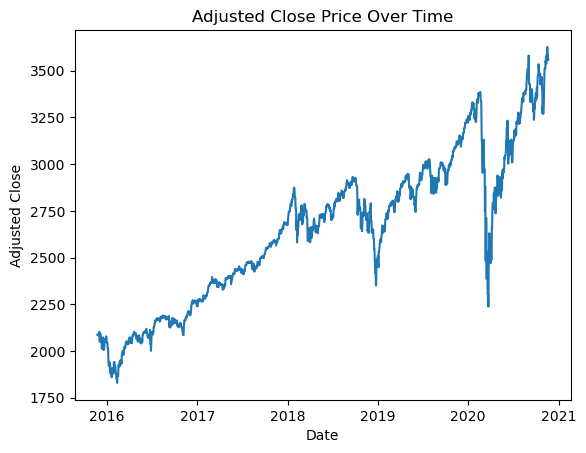

In [10]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Adj Close'])
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.show()

In [11]:
# Line plot of Volume traded over time to see if there's any correlation between price movement and trading activity

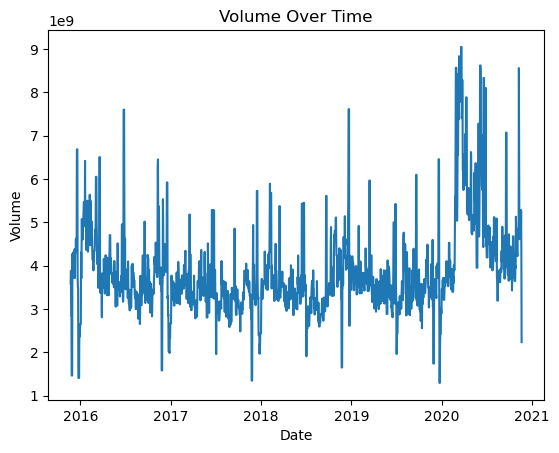

In [12]:
plt.plot(df['Date'], df['Volume'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [13]:
# Plotting moving averages (7-day) to reveal longer-term trends.

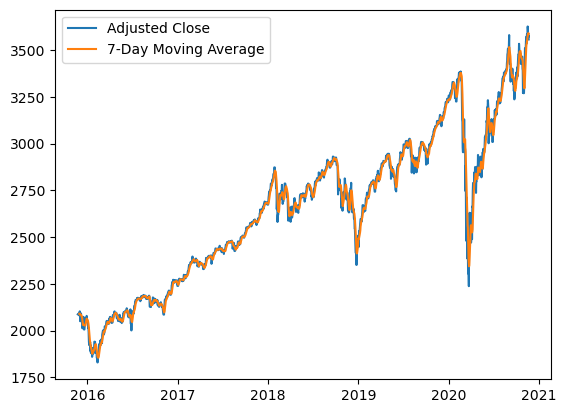

In [14]:
df['7_day_MA'] = df['Adj Close'].rolling(window=7).mean()
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close')
plt.plot(df['Date'], df['7_day_MA'], label='7-Day Moving Average')
plt.legend()
plt.show()

In [15]:
# Correlation between numerical features (e.g., Open, High, Low, Close, Volume, Adjusted Close) using a heatmap

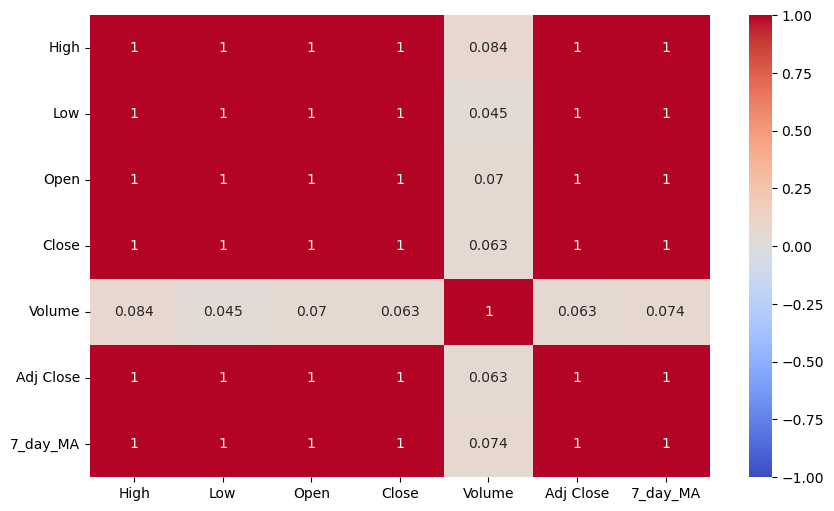

In [16]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [21]:
''' Extracting the month and day of the week from the Date column and analyze how the Adjusted Close price varies across 
different months and days '''

<AxesSubplot:xlabel='Day_of_Week', ylabel='Adj Close'>

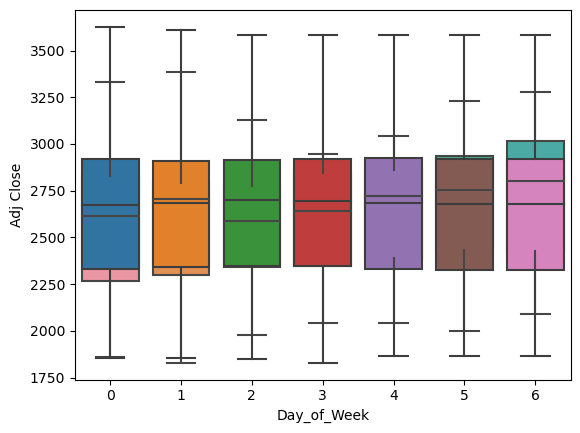

In [17]:
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek
sns.boxplot(x='Month', y='Adj Close', data=df)
sns.boxplot(x='Day_of_Week', y='Adj Close', data=df)

In [18]:
# Joint plot for volume analysis to visualize how the trading volume is related to price changes

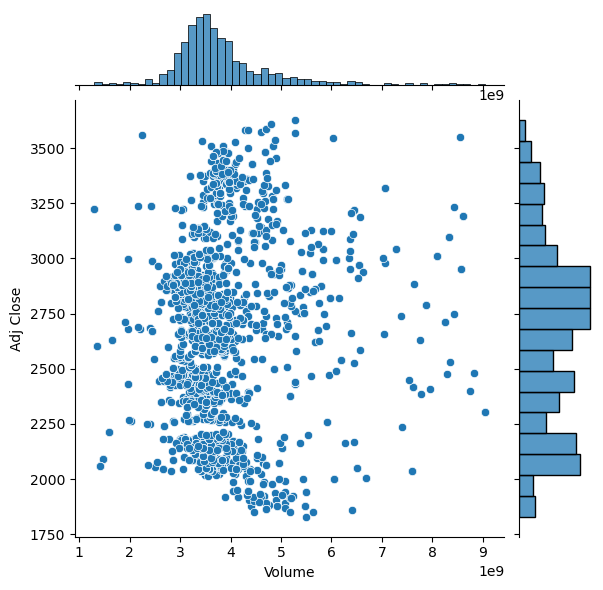

In [19]:
sns.jointplot(x='Volume', y='Adj Close', data=df, kind='scatter')

In [20]:
# Outlier detection using boxplots in Adj Close and Volume

C:\Users\Shu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Adj Close'>

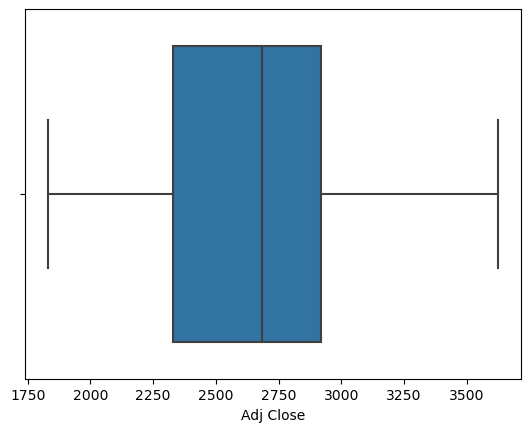

In [21]:
sns.boxplot(df['Adj Close'])

C:\Users\Shu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume'>

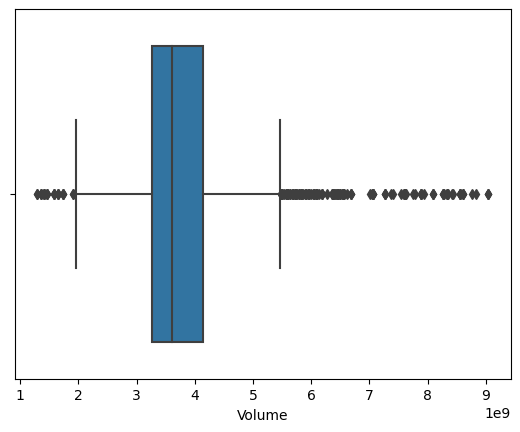

In [22]:
sns.boxplot(df['Volume'])

#  Creating lag features for previous days' Adjusted Close to be later used for model building, allowing it to learn from past stock price behavior.

In [23]:
df['Adj Close_lag1'] = df['Adj Close'].shift(1)
df['Adj Close_lag2'] = df['Adj Close'].shift(2)
df

,Date,High,Low,Open,Close,Volume,Adj Close,7_day_MA,Month,Day_of_Week,Adj Close_lag1,Adj Close_lag2
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN,11,0,NaN,NaN
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,NaN,11,1,2086.590088,NaN
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN,11,2,2089.139893,2086.590088
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN,11,3,2088.870117,2089.139893
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,NaN,11,4,2088.870117,2088.870117
...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,3576.794224,11,0,3585.149902,3585.149902
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,3585.937081,11,1,3626.909912,3585.149902
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,3585.241385,11,2,3609.530029,3626.909912
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,3591.649972,11,3,3567.790039,3609.530029


In [24]:
# Checking for stationarity (i.e., its statistical properties don't change over time).

In [25]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Adj Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.870397387016113
p-value: 0.7975646340657566


In [ ]:
'''

ADF Statistic: -0.8704
The more negative the ADF statistic, the stronger the evidence for stationarity. Typically, a very negative value indicates 
stationarity. In this case, the value is close to 0, which suggests that the series is likely non-stationary.

p-value: 0.7976
The p-value is used to test the null hypothesis of the ADF test, which states that the time series has a unit root 
(i.e., it is non-stationary).
If the p-value is below a chosen significance level (commonly 0.05), the null hypothesis can be rejected and it can be 
concluded that the series is stationary.
Since the p-value is 0.7976, which is much higher than 0.05, we fail to reject the null hypothesis, meaning that the series 
is likely non-stationary.

'''

In [26]:
df.isna().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
7_day_MA          6
Month             0
Day_of_Week       0
Adj Close_lag1    1
Adj Close_lag2    2
dtype: int64

In [27]:
df.dropna(inplace = True)

In [28]:
df.shape

(1819, 12)

In [29]:
df = df.drop(['Date', 'Close'], axis = 1)

In [30]:
df.head()

,High,Low,Open,Volume,Adj Close,7_day_MA,Month,Day_of_Week,Adj Close_lag1,Adj Close_lag2
6,2093.290039,2084.129883,2088.820068,1.466840e+09,2090.110107,2089.114362,11,6,2090.110107,2090.110107
7,2093.810059,2080.409912,2090.949951,4.275030e+09,2080.409912,2088.231480,11,0,2090.110107,2090.110107
8,2103.370117,2082.929932,2082.929932,3.712120e+09,2102.629883,2090.158622,12,1,2080.409912,2090.110107
9,2104.270020,2077.110107,2101.709961,3.950640e+09,2079.510010,2088.821463,12,2,2102.629883,2080.409912
10,2085.000000,2042.349976,2080.709961,4.306490e+09,2049.620117,2083.214321,12,3,2079.510010,2102.629883


# Splitting input and output columns & train and test data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.model_selection import train_test_split

# Creating a list of input features
input_features = ['High', 'Low', 'Open', 'Volume', '7_day_MA', 'Month', 'Day_of_Week', 'Adj Close_lag1', 'Adj Close_lag2']

# Output/target column
target_column = 'Adj Close'

# Step 1: Separate Input and Output Columns
X = df[input_features]  # Input features
y = df[target_column]  # Output/target

# Step 2: Train-Test Split
# We can split the data into train and test sets, keeping the temporal nature of the data in mind
# Here, we'll split by an 80-20 ratio, where 80% of the data is for training and 20% for testing

# Split the data (we can also split manually to preserve chronological order)
train_size = int(len(df) * 0.8)

# Training data
X_train = X[:train_size]
y_train = y[:train_size]

# Testing data
X_test = X[train_size:]
y_test = y[train_size:]

# Check the shape of the split datasets
print(f"Training data (X_train): {X_train.shape}")
print(f"Training target (y_train): {y_train.shape}")
print(f"Testing data (X_test): {X_test.shape}")
print(f"Testing target (y_test): {y_test.shape}")


Training data (X_train): (1455, 9)
Training target (y_train): (1455,)
Testing data (X_test): (364, 9)
Testing target (y_test): (364,)


# Model building using SARIMA as it is specifically designed to handle non-stationary time series data.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 1: Set up the SARIMA model on the training data
# Let's assume (p, d, q) = (1, 1, 1) and (P, D, Q, s) = (1, 1, 1, 5) as an initial guess

# SARIMA model (can be later adjusted p,d,q,P,D,Q,s based on grid search or AIC/BIC)

sarima_model = SARIMAX(y_train, 
                       order=(1, 1, 1),      # p,d,q for non-seasonal part
                       seasonal_order=(1, 1, 1, 5), # P,D,Q,s for seasonal part (s = 5 for 5-day week)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit(disp=False)

C:\Users\Shu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Evaluating the model

C:\Users\Shu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 260.24494342956916
MAE: 188.21678634184056
MAPE: 6.517853649146519%


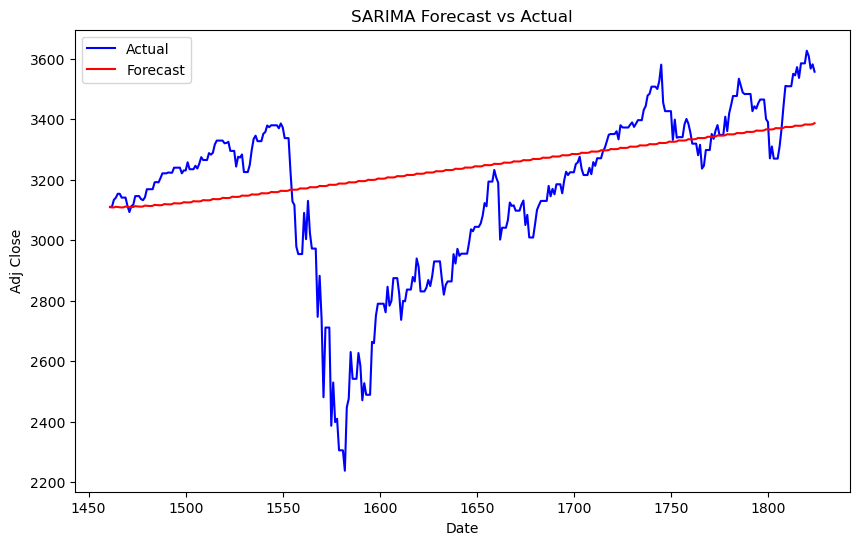

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Step 1: Forecast the stock prices on the test set
forecast = sarima_result.forecast(steps=len(y_test))

# Step 2: Calculate RMSE, MAE, and MAPE
rmse = sqrt(mean_squared_error(y_test, forecast))
mae = mean_absolute_error(y_test, forecast)
mape = np.mean(np.abs((y_test - forecast) / y_test)) * 100

# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

# Step 3: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

# Interpreting the model performance

In [35]:
df['Adj Close'].min(), df['Adj Close'].max(), df['Adj Close'].mean(), df['Adj Close'].median()

(1829.0799560546875, 3626.909912109375, 2649.699850710491, 2684.570068359375)

In [ ]:
'''

RMSE (260.24):

RMSE represents the average error of 260.24 units.
Now, considering the mean of the data (2649.70) and median (2684.57), RMSE = 260.24 is still about 9.8% of the mean 
(260.24 / 2649.70 ≈ 0.098) and 9.7% of the median (260.24 / 2684.57 ≈ 0.097).
This means that the model's predictions are off by about 9.7% - 9.8% on average from the actual stock prices, which is 
acceptable for stock price predictions, especially considering the volatility of financial markets.

MAE (188.22):

The MAE of 188.22 units is equivalent to 7.1% of the mean (188.22 / 2649.70 ≈ 0.071), and 7.0% of the median 
(188.22 / 2684.57 ≈ 0.070). Again, this is a reasonable error relative to the mean and median prices.

MAPE (6.52%):

MAPE = 6.52%, which remains consistent. A MAPE below 10% is generally considered good, and this holds 
true here as well.


'''